## Simple GUI that detects the type of Image

In this project, a GUI interface is developed to view and classify the Image. First Part is regarding the creation of Images from cifar10 dataset and testing and training is performed on it with the help of keras. In the second part, a Graphical User Interface is used to visualize the image on the screen and to identify which class it belongs from the group of defined classes. 

### Image Classsification-Deep Learning Project with Keras

In [8]:
# importing the dataset module from keras

from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

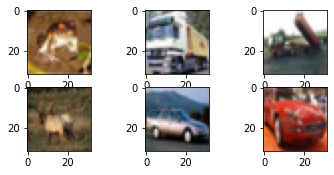

In [15]:
# Visualising the data

n = 6
for i in range(n):
    plt.subplot(3,3,i+1)
    plt.imshow(train_X[i])
plt.show()

In [6]:
# Importing the necessary libraries for creating the project

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import adam_v2
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [7]:
# Converting the pixel values of the dataset to float and normalizing it

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X/255.0
test_X = test_X/255.0

In [9]:
# Performing one hot encoding for the target class

train_Y = np_utils.to_categorical(train_Y)
test_Y = np_utils.to_categorical(test_Y)

num_class = test_Y.shape[1]

In [10]:
# Neural Network: Creating a Sequential model and adding the layers

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(32,32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))

model.add(Dense(num_class, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [14]:
# Training the model 

model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 252s 135ms/step - loss: 12.6962 - accuracy: 0.2203 - val_loss: 1.5576 - val_accuracy: 0.4365
Epoch 2/10
1563/1563 [==============================] - 208s 133ms/step - loss: 1.5488 - accuracy: 0.4461 - val_loss: 1.3688 - val_accuracy: 0.5179
Epoch 3/10
1563/1563 [==============================] - 209s 134ms/step - loss: 1.3391 - accuracy: 0.5286 - val_loss: 1.1758 - val_accuracy: 0.5866
Epoch 4/10
1563/1563 [==============================] - 209s 134ms/step - loss: 1.1978 - accuracy: 0.5810 - val_loss: 1.1541 - val_accuracy: 0.6028
Epoch 5/10
1563/1563 [==============================] - 213s 136ms/step - loss: 1.1154 - accuracy: 0.6073 - val_loss: 1.1211 - val_accuracy: 0.6101
Epoch 6/10
1563/1563 [==============================] - 211s 135ms/step - loss: 1.0804 - accuracy: 0.6231 - val_loss: 1.1188 - val_accuracy: 0.6126
Epoch 7/10
1563/1563 [==============================] - 210s 134ms/step - loss: 1.0497 - accuracy: 0.6381 - val

In [16]:
# Evaluating the model

_, accuracy = model.evaluate(test_X, test_Y)
print("Test Accuracy for the trained model: ", accuracy*100)

313/313 [==============================] - 9s 29ms/step - loss: 1.1002 - accuracy: 0.6163
Test Accuracy for the trained model:  61.62999868392944


In [17]:
# Saving the model 

model.save("myfirst_cifarmodel.h5")

In [22]:
# Creating a dictionary to list all the classes in the dataset and make predictions for the model

results = {0:'Aeroplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}

from PIL import ImageTk, Image
import numpy as np
img = Image.open("horse.jpg")

img = img.resize((32,32))
img = np.expand_dims(img, axis=0)
img = np.array(img)
pred = model.predict_classes([img])[0]
print(pred, results[pred])

7 Horse


C:\Users\User\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Classification with GUI

In [16]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np

# loading the trained model to classify the images

from keras.models import load_model
model = load_model('myfirst_cifarmodel.h5')

# creating a dictionary to label all the cifar10 dataset classes
classes={0:'Aeroplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}
         
# Initializing the GUI

top = tk.Tk()
top.geometry('800x600')
top.title('Image Classification')
top.configure(background='#CDD5EF')
label = Label(top, background='#CDD5EF', font=('times new roman', 14, 'bold'))
sign_image = Label(top)

In [17]:
file_path = 'C:/Users/User/OneDrive/Desktop/Computer-Vision-with-Python/Projects/'

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground="#011638", text=sign)

def show_classify_button(file_path):
    classify_b = Button(top, text="Classify Image", command = lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('times new roman', 14, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)
    
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25), (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
    
upload=Button(top,text="Upload an image",command=upload_image, padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()